In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import timesynth as ts

#### Harmonic Signals

In [3]:
#Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
#Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [4]:
#Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [5]:
#Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [6]:
#Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [7]:
#Sampling using the irregular time samples
samples, signals, errors = timeseries.sample_(irregular_time_samples)

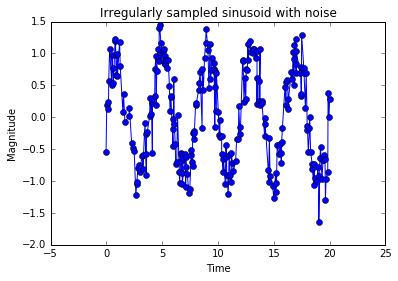

In [8]:
#Plotting the series
plt.plot(irregular_time_samples, samples, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise')

#### Harmonic Signals with Red noise

In [18]:
#Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [19]:
#Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [20]:
#Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample_(irregular_time_samples)

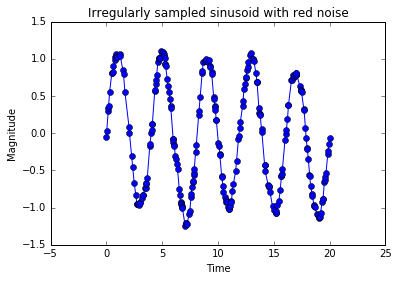

In [21]:
#Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

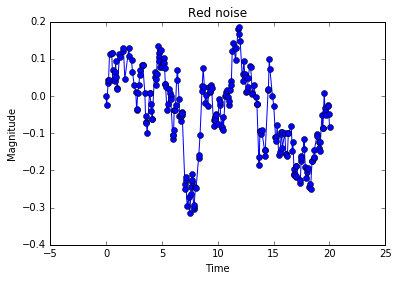

In [22]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise')